In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

In [10]:
sns.set(font_scale=2)

In [11]:
%matplotlib inline

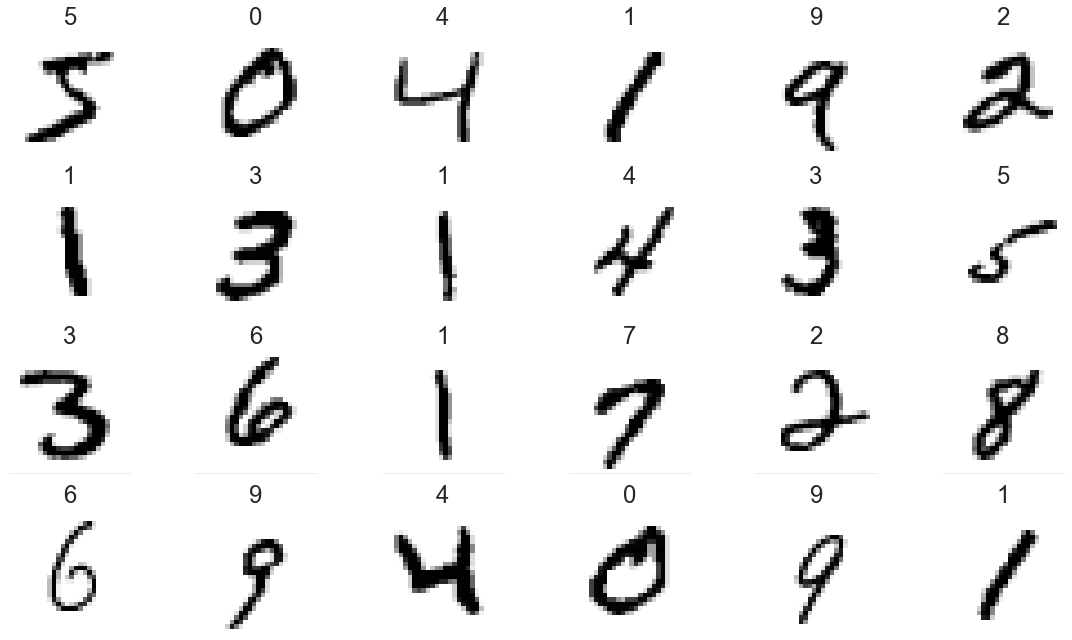

In [12]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train, y_train):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

In [13]:
X_train = X_train.reshape((60000, 28, 28, 1))

In [14]:
X_train.shape

(60000, 28, 28, 1)

In [15]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [16]:
X_test.shape

(10000, 28, 28, 1)

In [17]:
X_train = X_train.astype('float32') / 255

In [18]:
X_test = X_test.astype('float32') / 255

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
y_train = to_categorical(y_train)

In [21]:
y_train.shape

(60000, 10)

In [22]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [23]:
y_train[16]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [24]:
y_test = to_categorical(y_test)

In [25]:
y_test.shape

(10000, 10)

In [26]:
from tensorflow.keras.models import Sequential

In [27]:
cnn = Sequential()

In [28]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [29]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [30]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [31]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [32]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [33]:
cnn.add(Flatten())

In [34]:
cnn.add(Dense(units=128, activation='relu'))

In [35]:
cnn.add(Dense(units=10, activation='softmax'))

In [36]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

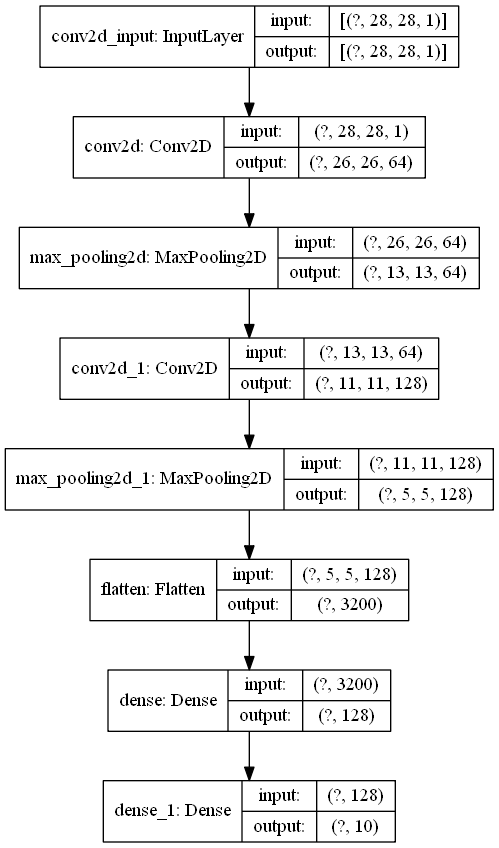

In [37]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='convnet.png')

In [38]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 72s 1ms/sample - loss: 0.1434 - acc: 0.9566 - val_loss: 0.0579 - val_acc: 0.9837
Epoch 2/5
54000/54000 [==============================] - 69s 1ms/sample - loss: 0.0446 - acc: 0.9863 - val_loss: 0.0353 - val_acc: 0.9902
Epoch 3/5
54000/54000 [==============================] - 66s 1ms/sample - loss: 0.0296 - acc: 0.9904 - val_loss: 0.0327 - val_acc: 0.9913
Epoch 4/5
54000/54000 [==============================] - 61s 1ms/sample - loss: 0.0216 - acc: 0.9929 - val_loss: 0.0417 - val_acc: 0.9878
Epoch 5/5
54000/54000 [==============================] - 60s 1ms/sample - loss: 0.0157 - acc: 0.9950 - val_loss: 0.0331 - val_acc: 0.9912


In [40]:
loss, accuracy = cnn.evaluate(X_test, y_test)

10000/10000 [==============================] - 4s 442us/sample - loss: 0.0285 - acc: 0.9917


In [41]:
loss

0.028517739022215393

In [42]:
accuracy

0.9917

In [43]:
predictions = cnn.predict(X_test)

In [44]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [45]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000000006%
1: 0.0000001864%
2: 0.0000000106%
3: 0.0000005119%
4: 0.0000000000%
5: 0.0000000004%
6: 0.0000000000%
7: 100.0000000000%
8: 0.0000000579%
9: 0.0000012483%


In [46]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))

In [47]:
len(incorrect_predictions)

83

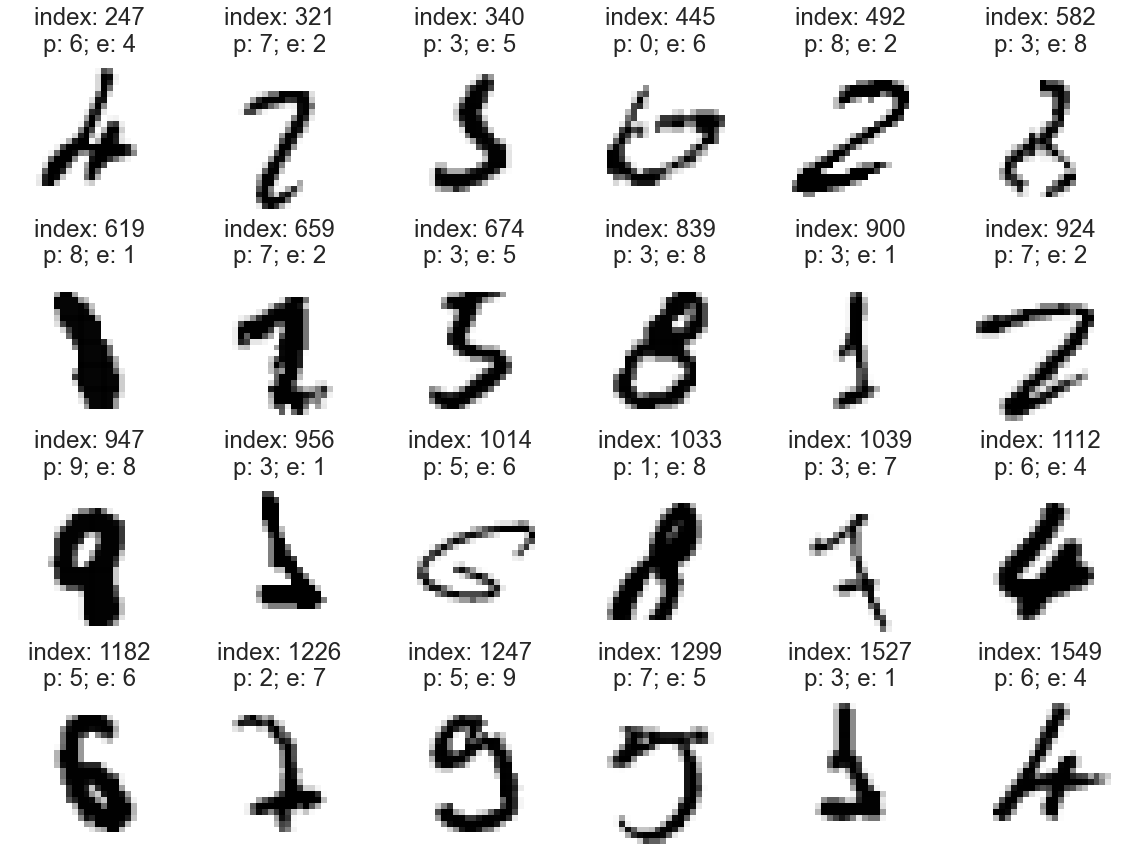

In [48]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))
for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [49]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [50]:
display_probabilities(predictions[619])

0: 0.0013459017%
1: 38.9623463154%
2: 0.0441404991%
3: 2.3267885670%
4: 0.0140746895%
5: 0.3447991796%
6: 0.0069120484%
7: 0.1365974313%
8: 58.1533014774%
9: 0.0097011900%


In [51]:
display_probabilities(predictions[1299])

0: 0.0000636073%
1: 0.0018706534%
2: 0.0001645050%
3: 8.8721208274%
4: 0.0006109582%
5: 37.7946197987%
6: 0.0000000424%
7: 53.2412528992%
8: 0.0000520858%
9: 0.0892519718%


In [52]:
display_probabilities(predictions[1737])

0: 0.0003723281%
1: 0.0206247365%
2: 0.0274984865%
3: 20.4433187842%
4: 0.0003698660%
5: 77.7692556381%
6: 0.1623219927%
7: 0.0047411118%
8: 1.5713272616%
9: 0.0001759478%


In [53]:
display_probabilities(predictions[2018])

0: 0.1517848927%
1: 46.5335279703%
2: 4.6009574085%
3: 4.5943278819%
4: 0.0978727709%
5: 0.0096423180%
6: 0.0022249933%
7: 29.3849438429%
8: 14.5601928234%
9: 0.0645259570%


In [54]:
display_probabilities(predictions[1393])

0: 0.0000049211%
1: 0.0394514791%
2: 0.0000174201%
3: 45.0001388788%
4: 0.0000211001%
5: 54.8473119736%
6: 0.0002169801%
7: 0.0887085218%
8: 0.0240196619%
9: 0.0001066584%


In [55]:
display_probabilities(predictions[1403])

0: 0.0000571863%
1: 99.9958872795%
2: 0.0000220449%
3: 0.0000012564%
4: 0.0000403856%
5: 0.0000586971%
6: 0.0017002189%
7: 0.0000062067%
8: 0.0022169477%
9: 0.0000000965%


In [56]:
cnn.save('mnist_cnn.h5')

ImportError: `save_model` requires h5py.